In [ ]:
import time
from urllib import urlencode
import selenium.webdriver
from bs4 import BeautifulSoup
import itertools
import pandas as pd

def first_search_boardgamegeek(query, browser, delay=10):
    search_url = "https://boardgamegeek.com/browse/boardgame/page/{}".format(query)
    browser.get(search_url)
    #time.sleep(delay)  # Delay is unnecessary for this site
    return browser.page_source

def get_game_url(product_tag):
    title_elements = product_tag.select('a')
    if title_elements:
        product_title = title_elements[1].get('href')
        return product_title
    
def get_boardgamegeek_product_details(query, browser):
    html = first_search_boardgamegeek(query, browser)
    soup = BeautifulSoup(html, 'html.parser')
    product_tags = soup.find_all("tr", id="row_")
    product_tags.extend(soup.find_all("tr", id="row_"))
    return [get_game_url(t) for t in product_tags]

browser = selenium.webdriver.Firefox()
product_details = []
for i in xrange(1, 136):
    product_details.append(get_boardgamegeek_product_details(i, browser)[:100])
browser.quit()

product_details = list(itertools.chain.from_iterable(product_details))

def second_search_boardgamegeek(query, browser, delay=10):
    search_url = "https://boardgamegeek.com{}".format(query)
    browser.get(search_url)
    #time.sleep(delay)  # Wait a few seconds before getting the HTML source
    return browser.page_source

def get_boardgamegeek_game_details(query, browser):
    html = second_search_boardgamegeek(query, browser)
    soup = BeautifulSoup(html, 'html.parser')
    product_tags = soup.find_all("div", class_="content")
    return [(get_game_title(t), get_secondary_game_info(t), get_the_rest(t)) for t in product_tags]

def get_game_title(product_tag):
    title_elements = product_tag.find_all("div", class_="game-header-title-info")
    if title_elements:
        game_title = title_elements[1].find_all('h1')
        year_published = game_title[0].text.split()[-1:]
        game_title = ' '.join(game_title[0].text.split()[:-1])
        return game_title, year_published
    
def get_secondary_game_info(product_tag):
    title_elements = product_tag.find_all('li', attrs={'class':'gameplay-item'})
    if title_elements:
        game_info = title_elements
        num_players = game_info[0].text.split()
        min_players = num_players[0][0]
        max_players = num_players[0][2:]
        best_players = num_players[-1]
        play_time = game_info[1].text.split()[0].split(u'\u2013')
        age = game_info[2].text.split()[1].strip('+')
        complexity = game_info[3].text.split()[2]
        return min_players, max_players, best_players, play_time, age, complexity
    
def get_the_rest(product_tag):
    title_elements = product_tag.find_all('li', attrs={'class':'outline-item'})
    if title_elements:
        game_title = title_elements
        designers = game_title[3].find_all('a')[1:]
        for i, designer in enumerate(designers):
            designers[i] = designer.text
        artists = game_title[4].find_all('a')[1:]
        for i, artist in enumerate(artists):
            artists[i] = artist.text
        publishers = game_title[5].find_all('a')[1:]
        for i, publisher in enumerate(publishers):
            publishers[i] = publisher.text
        categories = game_title[6].find_all('a')[1:]
        for i, categorie in enumerate(categories):
            categories[i] = categorie.text
        mechanisms = game_title[7].find_all('a')[1:]
        for i, mechanism in enumerate(mechanisms):
            mechanisms[i] = mechanism.text
        return designers, artists, publishers, categories, mechanisms
    
browser = selenium.webdriver.Firefox()
game_details = []
for i in product_details:
    new_search = '{}/credits'.format(i)
    game_info = get_boardgamegeek_game_details(new_search, browser)[0]
    all_info = [game_info[0][0], game_info[0][1][0], game_info[1][0], \
                    game_info[1][1], game_info[1][2], game_info[1][3], game_info[1][4], game_info[1][5], \
                   game_info[2][0], game_info[2][1], game_info[2][2], game_info[2][3], game_info[2][4]]
    if all_info[3] == '':
        all_info[3] = all_info[2]
    try:
        all_info[5][1]
    except IndexError:
        all_info[5].append(all_info[5][0])
    game_details.append(all_info)
browser.quit()

board_game_data = pd.DataFrame\
(game_details, index=range(1, 13501), columns=[ \
                         'Title', 'Year Published',\
                         'Min Players', 'Max Players', 'Best Players',\
                         'Play Time', 'Age', 'Complexity', 'Designers',\
                         'Artists', 'Publishers', 'Categories',\
                         'Mechanisms'])

board_game_data.to_csv('boardgame_data.csv', encoding='utf-8')

#GAME CALLED ¥€$ SHOULD SEARCH https://boardgamegeek.com////credits, NOT WHATEVER IS IN product_details[13107]. NEED TO FIX THIS LATER.
#IMPORTED ¥€$ DATA MANUALLY

In [43]:
import time
from urllib import urlencode
import selenium.webdriver
from bs4 import BeautifulSoup
import itertools
import pandas as pd

def first_search_boardgamegeek(query, browser, delay=10):
    search_url = "https://boardgamegeek.com/browse/boardgame/page/{}".format(query)
    browser.get(search_url)
    #time.sleep(delay)  # Delay is unnecessary for this site
    return browser.page_source

def get_game_url(product_tag):
    title_elements = product_tag.find_all('img')
    if title_elements:
        image_number = title_elements[0].get('src').split('/')[-1].split('_')[0][3:]
        return title_elements, image_number
    
def get_boardgamegeek_product_details(query, browser):
    html = first_search_boardgamegeek(query, browser)
    soup = BeautifulSoup(html, 'html.parser')
    product_tags = soup.find_all("tr", id="row_")
    product_tags.extend(soup.find_all("tr", id="row_"))
    return [get_game_url(t) for t in product_tags]

browser = selenium.webdriver.Firefox()
image_details = []
for i in xrange(1, 137):
    image_details.append(get_boardgamegeek_product_details(i, browser)[:100])
browser.quit()

In [47]:
new_image_details = list(itertools.chain.from_iterable(image_details))

In [55]:
len(new_image_details)

13600

In [54]:
new_image_details[1382]

In [37]:
game_urls_df.loc[0, 'Game URL'].split('/')[-1]

'pandemic-legacy-season-1'

In [ ]:
https://boardgamegeek.com/image/2452831/pandemic-legacy-season-1

In [56]:
image_urls = []
for i in xrange(13600):
    try:
        image_urls.append('https://boardgamegeek.com/image/{}/{}'.format(
                new_image_details[i][1], 
                game_urls_df.loc[i, 'Game URL'].split('/')[-1]))
    except TypeError:
        continue

In [57]:
len(image_urls)

13591

In [244]:
def first_search_boardgamegeek(query, browser, delay=10):
    search_url = query
    browser.get(search_url)
    #time.sleep(delay)  # Delay is unnecessary for this site
    return browser.page_source

def get_game_title(product_tag):
    title_elements = product_tag.find_all('b')
    if title_elements:
        return title_elements

def get_game_url(product_tag):
    string = '//cf.geekdo-images.com/images/pic{}'.format(image_urls[i].split('/')[4])
    title_elements = product_tag.find_all('img', {"src": lambda x: x and x.startswith(string)})
    if title_elements:
        return title_elements[0]
    
def get_boardgamegeek_product_details(query, browser):
    html = first_search_boardgamegeek(query, browser)
    soup = BeautifulSoup(html, 'html.parser')
    product_tags = soup.find_all("td")
    product_tags.extend(soup.find_all("td"))
    return [(get_game_title(t), get_game_url(t)) for t in product_tags]

browser = selenium.webdriver.Firefox()
for i in xrange(1549, 13600):
    response = get_boardgamegeek_product_details(image_urls[i], browser)
    for thing in response:
        if thing[0] and thing[1]:
            new_image_details.append((thing[0][0].text, 'https:'+thing[1].get('src')))
            break
browser.quit()

IndexError: list index out of range

In [216]:
len(image_details)

9344

In [245]:
len(new_image_details)

13591

In [250]:
titles = []
images = []
for title, image in new_image_details:
        titles.append(title)
        images.append(image)

In [252]:
image_df = pd.DataFrame({'title':titles, 'image_url':image_urls, 'image':images})

In [62]:
game_urls = []
for data in product_details:
    game_urls.append(data[:100])
game_urls = list(itertools.chain.from_iterable(game_urls))
count = 0
game_urls_df = pd.DataFrame(game_urls, columns=['Title', 'Game URL'])

In [166]:
game_urls_df['connector'] = game_urls_df.loc[:, 'Game URL'].apply(lambda x: x.split('/')[3])

In [21]:
game_urls_df = pd.read_csv('/Users/ericyatskowitz/galvanize_work/MeepleFinder/Erics_Web_App/just_urls.csv')

In [267]:
game_urls_df

,Game URL,connector
Title,,
Pandemic Legacy: Season 1,/boardgame/161936/pandemic-legacy-season-1,pandemic-legacy-season-1
Through the Ages: A New Story of Civilization,/boardgame/182028/through-ages-new-story-civil...,through-ages-new-story-civilization
Twilight Struggle,/boardgame/12333/twilight-struggle,twilight-struggle
Terra Mystica,/boardgame/120677/terra-mystica,terra-mystica
Star Wars: Rebellion,/boardgame/187645/star-wars-rebellion,star-wars-rebellion
Scythe,/boardgame/169786/scythe,scythe
7 Wonders Duel,/boardgame/173346/7-wonders-duel,7-wonders-duel
Caverna: The Cave Farmers,/boardgame/102794/caverna-cave-farmers,caverna-cave-farmers
The Castles of Burgundy,/boardgame/84876/castles-burgundy,castles-burgundy


In [207]:
image_df['connector'] = image_df.loc[:, 'image_url'].apply(lambda x: x.split('/')[5])

In [208]:
image_df = image_df.set_index('connector')

In [209]:
url_df = game_urls_df.join(image_df, on='connector', how='outer', rsuffix='url')

In [272]:
advanced = pd.DataFrame({'Title': 'Advanced Civilization', 'Game URL': '/boardgameexpansion/177/advanced-civilization'}, index=[0])

In [274]:
advanced

,Game URL,Title
0,/boardgameexpansion/177/advanced-civilization,Advanced Civilization


In [262]:
image_df.loc['Advanced Civilization', :]

image        https://cf.geekdo-images.com/images/pic87459_m...
image_url     https://boardgamegeek.com/image/87459/looney-leo
Name: Advanced Civilization, dtype: object

In [255]:
image_df.to_csv('image_urls.csv', encoding='utf-8')

In [276]:
game_urls_df = pd.read_csv('/Users/ericyatskowitz/galvanize_work/MeepleFinder/Erics_Web_App/just_urls.csv')

In [278]:
game_urls_df.drop('Unnamed: 0', axis=1, inplace=True)

In [280]:
game_urls_df = game_urls_df.append(advanced)

In [281]:
game_urls_df

,Game URL,Title
0,/boardgame/161936/pandemic-legacy-season-1,Pandemic Legacy: Season 1
1,/boardgame/182028/through-ages-new-story-civil...,Through the Ages: A New Story of Civilization
2,/boardgame/12333/twilight-struggle,Twilight Struggle
3,/boardgame/120677/terra-mystica,Terra Mystica
4,/boardgame/187645/star-wars-rebellion,Star Wars: Rebellion
5,/boardgame/169786/scythe,Scythe
6,/boardgame/173346/7-wonders-duel,7 Wonders Duel
7,/boardgame/102794/caverna-cave-farmers,Caverna: The Cave Farmers
8,/boardgame/84876/castles-burgundy,The Castles of Burgundy
9,/boardgame/3076/puerto-rico,Puerto Rico


In [282]:
game_urls_df.to_csv('just_urls.csv')

In [6]:
import boto3
import pandas as pd
client = boto3.client('s3')
bg_sim = client.get_object(Bucket='ericyatskowitz', Key='data/game_similarity_matrix.csv')['Body']
bg_sim_df = pd.read_csv(bg_sim)
bg_sim_df = bg_sim_df.set_index('Title')

In [9]:
bg_sim_df = pd.read_csv(bg_sim)

In [10]:
bg_sim_df = bg_sim_df.set_index('Title')

In [11]:
bg_sim_df.head()

,12707,18208,18969,17052,16126,14862,287,3604,17261,13567,...,6080,2493,15188,12613,18783,5493,8627,19912,7157,3111
Title,,,,,,,,,,,,,,,,,,,,,
12707,0.000000,0.708281,0.770849,0.727712,0.816347,0.889448,0.748781,0.728686,0.875721,0.740128,...,0.866311,0.879410,0.900374,0.869302,0.877502,0.899080,0.886996,0.863855,0.829384,0.880233
18208,0.708281,0.000000,0.753508,0.708065,0.798140,0.830368,0.684514,0.795551,0.914325,0.764362,...,0.795261,0.771954,0.896759,0.852347,0.866818,0.890256,0.882898,0.837862,0.818518,0.771396
18969,0.770849,0.753508,0.000000,0.811343,0.662795,0.888595,0.889898,0.853149,0.824946,0.860648,...,0.706969,0.878594,0.903713,0.867809,0.878627,0.900017,0.890754,0.858422,0.756454,0.878966
17052,0.727712,0.708065,0.811343,0.000000,0.915257,0.713030,0.888513,0.607767,0.823022,0.663420,...,0.862900,0.875320,0.903529,0.864419,0.876871,0.898626,0.890553,0.853273,0.906394,0.788375
16126,0.816347,0.798140,0.662795,0.915257,0.000000,0.804990,0.803642,0.916958,0.841962,0.922765,...,0.764403,0.846607,0.878363,0.833086,0.846646,0.873615,0.738428,0.820845,0.693612,0.846931


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
game_desc = pd.read_csv('/Users/ericyatskowitz/galvanize_work/MeepleFinder/Erics_Web_App/game_descriptions.csv')

In [4]:
game_desc

,Unnamed: 0,Unnamed: 0.1,Title,game_description
0,0,0,Pandemic Legacy: Season 1,Pandemic Legacy is a co-operative campaign...
1,1,1,Through the Ages: A New Story of Civilization,Through the Ages: A New Story of Civilizat...
2,2,2,Twilight Struggle,"""Now the trumpet summons us again, not as ..."
3,3,3,Terra Mystica,In the land of Terra Mystica dwell 14 diff...
4,4,4,Star Wars: Rebellion,From the publisher:\nStar Wars: Rebellion ...
5,5,5,Scythe,It is a time of unrest in 1920s Europa. Th...
6,6,6,7 Wonders Duel,In many ways 7 Wonders Duel resembles its ...
7,7,7,Caverna: The Cave Farmers,Following along the same lines as its pred...
8,8,8,The Castles of Burgundy,The game is set in the Burgundy region of ...
9,9,9,Puerto Rico,In Puerto Rico players assume the roles of...


In [133]:
game_desc['Title'] = game_desc.index

In [6]:
game_desc.set_value(index=1061, col='Title', value='Carrom')

,Unnamed: 0,Title,game_description
0,0,Pandemic Legacy: Season 1,Pandemic Legacy is a co-operative campaign...
1,1,Through the Ages: A New Story of Civilization,Through the Ages: A New Story of Civilizat...
2,2,Twilight Struggle,"""Now the trumpet summons us again, not as ..."
3,3,Terra Mystica,In the land of Terra Mystica dwell 14 diff...
4,4,Star Wars: Rebellion,From the publisher:\nStar Wars: Rebellion ...
5,5,Scythe,It is a time of unrest in 1920s Europa. Th...
6,6,7 Wonders Duel,In many ways 7 Wonders Duel resembles its ...
7,7,Caverna: The Cave Farmers,Following along the same lines as its pred...
8,8,The Castles of Burgundy,The game is set in the Burgundy region of ...
9,9,Puerto Rico,In Puerto Rico players assume the roles of...


In [5]:
game_desc.iloc[1061, :]['game_description'].strip()[:400] + '...'

'Carrom is most easily described as "finger pool". On a 29" x 29" wooden board, players flick a large weighted disc (the striker) at smaller wooden discs (the carrom-men). The goal is to sink your 9 carrom-men (black or white), as well as the red Queen, in the four corner pockets. The first player or team to accomplish this collects points for the round (commonly called a "board"). A standard game ...'

In [6]:
game_desc2 = pd.read_csv('game_descriptions_3.csv')

In [ ]:
game_desc.loc[game, :]['game_description'].strip()[:400] + '...'

In [31]:
bad_titles = []
types = []
count = 0
for game in game_desc2.index:
    if type(game_desc.loc[game, :]['game_description']) != str:
        count += 1
print count

0


In [7]:
big_game_desc = game_desc.append(game_desc2)

In [8]:
big_game_desc

,Title,Unnamed: 0,Unnamed: 0.1,game_description
0,Pandemic Legacy: Season 1,0,0.0,Pandemic Legacy is a co-operative campaign...
1,Through the Ages: A New Story of Civilization,1,1.0,Through the Ages: A New Story of Civilizat...
2,Twilight Struggle,2,2.0,"""Now the trumpet summons us again, not as ..."
3,Terra Mystica,3,3.0,In the land of Terra Mystica dwell 14 diff...
4,Star Wars: Rebellion,4,4.0,From the publisher:\nStar Wars: Rebellion ...
5,Scythe,5,5.0,It is a time of unrest in 1920s Europa. Th...
6,7 Wonders Duel,6,6.0,In many ways 7 Wonders Duel resembles its ...
7,Caverna: The Cave Farmers,7,7.0,Following along the same lines as its pred...
8,The Castles of Burgundy,8,8.0,The game is set in the Burgundy region of ...
9,Puerto Rico,9,9.0,In Puerto Rico players assume the roles of...


In [33]:
big_game_desc.to_csv('game_descriptions.csv')

In [9]:
ratings_df = pd.read_csv('/Users/ericyatskowitz/galvanize_work/MeepleFinder/Erics_Web_App/new_wa_ratings_data.csv')

In [10]:
ratings_df = ratings_df.set_index('Username')

In [26]:
ratings_df

,!dentity Crisis?,"""In Pursuit of Par"" Par 72 Edition","""Oh My God! There's An Axe In My Head."" The Game of International Diplomacy","""Tarleton's Quarter!""",$ue Me!,& Cetera,'65: Squad-Level Combat in the Jungles of Vietnam,"'Ere We Go: Orks in Warhammer 40,000",(Target Bookshelf Edition) Risk (aka Risk),(Target Bookshelf Edition) Scrabble (aka Scrabble),...,Конфетти,Містеріум,…aber bitte mit Sahne (aka Piece o' Cake),エアライン・ヨーロッパ,ゲシェンク,メディチ カードゲーム,三千世界の鴉,大卫与歌利亚 (大衛與歌利亞),妖精奇譚,小市場
Username,,,,,,,,,,,,,,,,,,,,,
12thManStanding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2 Salt City Gamers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253bri,0.0,0.0,0.0,0.0,0.0,9.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2CoF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5th_Para_Bde,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADiplomat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGKorson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGRAYDAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGallela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
num_bg_ratings_df = (ratings_df != 0.0).sum(axis=0)

In [18]:
num_bg_ratings_df

!dentity Crisis?                                                                 1
"In Pursuit of Par" Par 72 Edition                                               1
"Oh My God! There's An Axe In My Head." The Game of International Diplomacy      6
"Tarleton's Quarter!"                                                            1
$ue Me!                                                                          1
& Cetera                                                                         2
'65: Squad-Level Combat in the Jungles of Vietnam                                1
'Ere We Go: Orks in Warhammer 40,000                                             1
(Target Bookshelf Edition) Risk (aka Risk)                                       1
(Target Bookshelf Edition) Scrabble (aka Scrabble)                               1
(Target Bookshelf Edition) Stratego (aka Stratego)                               1
*Star                                                                            1
+6 B

In [102]:
count = 0
for i in xrange(1, 4):
    count += (num_bg_ratings_df.values == i).sum()
print count

14965


In [121]:
(num_bg_ratings_df.values <= 1).sum()

9969

In [120]:
num_bg_ratings_df.sort_values(ascending=False)

Catan                                                                        560
Carcassonne                                                                  518
Dominion                                                                     501
Ticket to Ride                                                               481
Pandemic                                                                     452
Puerto Rico                                                                  430
7 Wonders                                                                    404
Power Grid                                                                   395
Agricola                                                                     381
Small World                                                                  364
Race for the Galaxy                                                          359
Citadels                                                                     339
Lost Cities                 

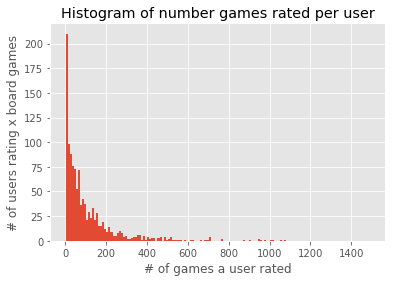

In [22]:
plt.hist(num_ratings_df.values, bins=range(1, 1501, 10))
plt.xlabel('# of games a user rated')
plt.ylabel('# of users rating x board games')
plt.title('Histogram of number games rated per user')

In [54]:
rating_hist = ratings_df.values.flatten()

In [55]:
rating_hist = [x for x in rating_hist if x != 0]

In [56]:
rating_hist

[6.0,
 5.0,
 6.0,
 8.9000000000000004,
 6.0,
 6.0,
 9.0,
 7.0,
 5.0,
 6.0,
 7.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 7.0,
 6.0,
 6.0,
 6.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 8.75,
 7.0,
 4.0,
 7.0,
 6.0,
 7.0,
 5.0,
 8.6500000000000004,
 8.1500000000000004,
 6.0,
 6.0,
 6.0,
 8.6999999999999993,
 5.0,
 5.0,
 8.4499999999999993,
 6.0,
 6.0,
 6.0,
 7.0,
 8.0500000000000007,
 8.0999999999999996,
 7.0,
 6.0,
 8.1999999999999993,
 7.0,
 7.0,
 7.0,
 8.3000000000000007,
 7.0,
 6.0,
 7.0,
 6.0,
 7.0,
 5.0,
 6.0,
 6.0,
 6.0,
 7.0,
 6.0,
 6.0,
 6.0,
 6.0,
 7.0,
 7.0,
 7.0,
 6.0,
 6.0,
 10.0,
 7.0,
 6.0,
 6.0,
 7.0,
 7.0,
 7.0,
 8.5999999999999996,
 6.0,
 6.0,
 7.0,
 7.0,
 6.0,
 6.0,
 6.0,
 7.0,
 5.0,
 6.0,
 7.0,
 5.0,
 5.0,
 7.0,
 6.0,
 4.0,
 8.5,
 8.9499999999999993,
 4.0,
 5.0,
 6.0,
 7.0,
 6.0,
 5.0,
 7.0,
 6.0,
 6.0,
 6.0,
 7.0,
 6.0,
 9.75,
 6.0,
 6.0,
 7.0,
 6.0,
 7.0,
 7.0,
 6.0,
 6.0,
 5.0,
 5.0,
 7.0,
 8.5500000000000007,
 6.0,
 8.8499999999999996,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 6.0

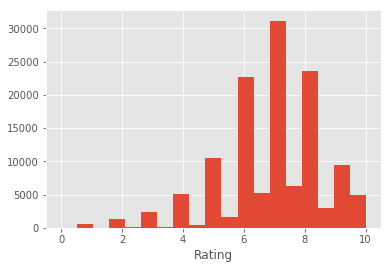

In [61]:
plt.hist(rating_hist, bins=np.linspace(0, 10, num=20))
plt.xlabel('Rating')

In [122]:
str('El Grande: K\xc3\xb6nig & Intrigant')

'El Grande: K\xc3\xb6nig & Intrigant'

In [123]:
print 'El Grande: K\xc3\xb6nig & Intrigant'

El Grande: König & Intrigant


In [124]:
unicode('El Grande: K\xc3\xb6nig & Intrigant')

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 12: ordinal not in range(128)